In [151]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pyproj
import contextily as cx
import os
import seaborn as sns
import folium
#from rasterio.crs import CRS
import geopandas as gpd
from shapely.geometry import Point
from pyproj import Proj, transform
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import squarify
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sqlalchemy import create_engine
from sqlalchemy import inspect
import matplotlib.cm as cm
from branca.element import Template, MacroElement

pyproj.datadir.set_data_dir('C:\\Users\\cegut\\.conda\\envs\\anomalias\\Library\\share\\proj')

In [57]:
datos = pd.read_csv("D:\\Jupyter\\aprendizaje_automático\\data\\intermedia\\base_limpia.csv") #D:\\Jupyter\\aprendizaje_automático\\data\\intermedia\\base_limpia.csv

In [58]:
#datos = datos.drop(columns = ['id'])
datos = datos.drop(columns = ['id', 'geometry', 'lat', 'long'])
datos.head()

,Unnamed: 0,price,builtArea,pricePerBuiltSqm,stratum,administrationFee,floor,isDuplex,privateArea,rooms,...,terraceArea,hasCommunalHall,hasTennisCourt,hasSoccerField,hasKidsPlayZone,hasGreenZones,isResidentialComplex,hasConcierge,hasVisitorParking,hasPool
0,0,1450000000,280.00,5.178571e+06,6.0,9.000000e+05,7.125252,0,280.00,3,...,28.139205,1,0,0,1,1,1,1,0,1
1,1,225000000,54.78,4.107338e+06,4.0,2.718438e+06,7.125252,0,54.78,3,...,28.139205,0,0,0,0,0,0,0,0,0
2,2,185000000,70.00,2.642857e+06,4.0,2.718438e+06,3.000000,0,70.00,2,...,28.139205,0,0,0,0,0,0,0,1,0
3,3,410000000,90.00,4.555556e+06,5.0,2.718438e+06,7.125252,0,90.00,3,...,28.139205,0,0,0,0,0,0,0,0,0
4,4,300000000,80.00,3.750000e+06,1.0,2.718438e+06,7.125252,0,80.00,3,...,28.139205,0,0,0,0,0,0,0,0,0


In [59]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

In [63]:
# Estandarizar los datos
scaler = StandardScaler()
data_estandarizada = scaler.fit_transform(datos)

In [89]:
neighbors = NearestNeighbors(n_neighbors = 20)
neighbors_fit = neighbors.fit(data_estandarizada)
distances, indices = neighbors_fit.kneighbors(data_estandarizada)

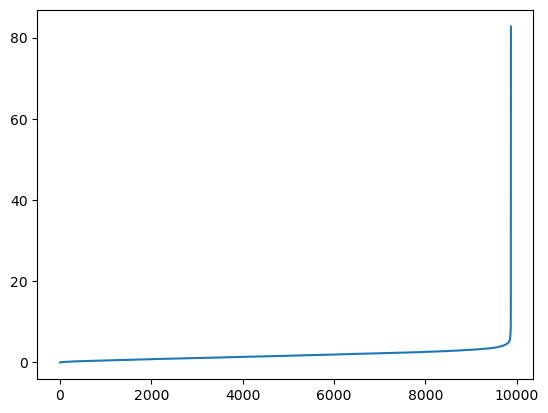

In [90]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

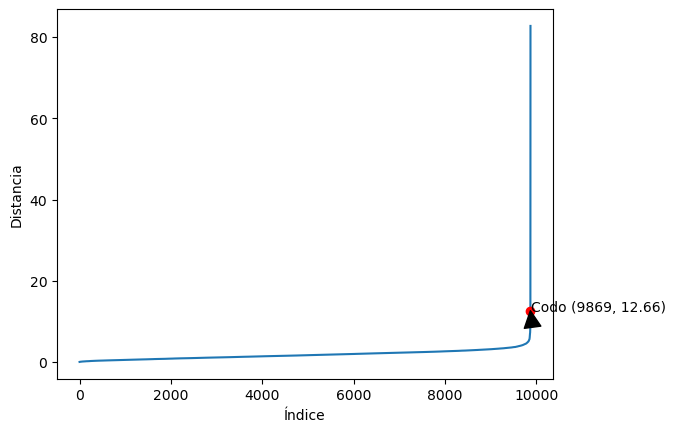

Valor de la distancia en el punto de codo: 12.656515617984809


In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Supongamos que tienes un array de distancias llamado 'distances'

# Ordenar las distancias
distances = np.sort(distances)

# Calcular la derivada de las distancias para identificar el codo
differences = np.diff(distances)
gradient = np.gradient(differences)

# Encontrar el punto de codo
elbow_point = np.argmax(gradient)

# Graficar las distancias
plt.plot(distances)
plt.xlabel('Índice')
plt.ylabel('Distancia')

# Marcar el punto de codo en el gráfico
plt.plot(elbow_point, distances[elbow_point], 'ro')  # Marcar el punto de codo con un círculo rojo
plt.annotate(f'Codo ({elbow_point}, {distances[elbow_point]:.2f})', xy=(elbow_point, distances[elbow_point]), xytext=(elbow_point+10, distances[elbow_point]-0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))  # Agregar texto al punto de codo

plt.show()

# Imprimir el valor de la distancia en el punto de codo
print(f"Valor de la distancia en el punto de codo: {distances[elbow_point]}")


In [107]:
# Escalar datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_estandarizada)

# Definir rangos para los parámetros eps y min_samples
eps_range = np.arange(0.1, 12.66, 0.1)
min_samples_range = range(30, 60)
 
# Inicializar variables para almacenar los mejores resultados
best_eps = None
best_min_samples = None
best_score = -1
desired_clusters = 20
tolerance = 2
 
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(data_estandarizada)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # Ignorar ruido
 
        if abs(n_clusters - desired_clusters) <= tolerance:
            try:
                score = silhouette_score(data_estandarizada, clusters)
                if score > best_score:
                    best_score = score
                    best_eps = eps
                    best_min_samples = min_samples
            except:
                # Si hay un solo cluster, silhouette_score no se puede calcular
                continue
 
print(f'Mejor eps: {best_eps}')
print(f'Mejor min_samples: {best_min_samples}')
print(f'Mejor Silhouette Score: {best_score}')

KeyboardInterrupt: 

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
from tqdm import tqdm

# Escalar datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_estandarizada)

# Definir rangos para los parámetros eps y min_samples
eps_range = np.arange(1, 12.66, 1)
min_samples_range = range(10, 40)
 
# Inicializar variables para almacenar los mejores resultados
best_eps = None
best_min_samples = None
best_score = -1
desired_clusters = 10
tolerance = 2

# Configurar la barra de progreso
total_iterations = len(eps_range) * len(min_samples_range)
with tqdm(total=total_iterations) as pbar:
    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(data_estandarizada)
            n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # Ignorar ruido

            if abs(n_clusters - desired_clusters) <= tolerance:
                try:
                    score = silhouette_score(data_estandarizada, clusters)
                    if score > best_score:
                        best_score = score
                        best_eps = eps
                        best_min_samples = min_samples
                except:
                    # Si hay un solo cluster, silhouette_score no se puede calcular
                    continue
            
            # Actualizar la barra de progreso
            pbar.update(1)

print(f'Mejor eps: {best_eps}')
print(f'Mejor min_samples: {best_min_samples}')
print(f'Mejor Silhouette Score: {best_score}')

100%|██████████████████████████████████████████████████████████████████████████████| 360/360 [1:02:13<00:00, 10.37s/it]

Mejor eps: 3.0
Mejor min_samples: 10
Mejor Silhouette Score: -0.048685618090631294


In [112]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps= 3, min_samples = 10)
clusters = dbscan.fit_predict(data_estandarizada)

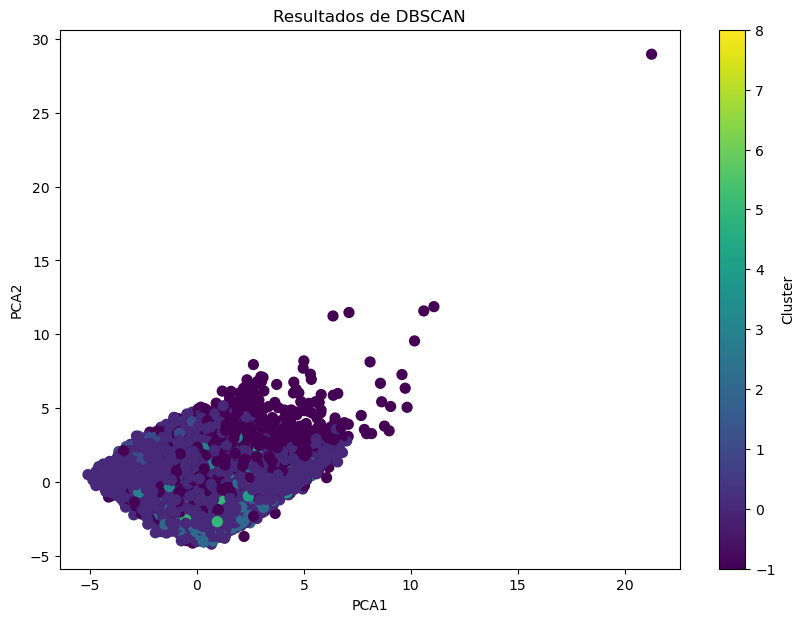

In [113]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
 
# Reducir la dimensionalidad a 2D usando PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_estandarizada)
 
# Crear un DataFrame con las dos primeras componentes principales
data_pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
data_pca_df['cluster'] = clusters
 
# Graficar los resultados
plt.figure(figsize=(10, 7))
plt.scatter(data_pca_df['PCA1'], data_pca_df['PCA2'], c=data_pca_df['cluster'], cmap='viridis', s=50)
plt.title('Resultados de DBSCAN')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()

In [114]:
# Añadir los resultados de los clusters al DataFrame
datos['cluster2'] = clusters
 
# Ver los primeros registros con los clusters asignados
print(datos.head())
 
# Contar el número de puntos en cada cluster
print(datos['cluster'].value_counts())

   Unnamed: 0       price  builtArea  pricePerBuiltSqm  stratum  \
0           0  1450000000     280.00      5.178571e+06      6.0   
1           1   225000000      54.78      4.107338e+06      4.0   
2           2   185000000      70.00      2.642857e+06      4.0   
3           3   410000000      90.00      4.555556e+06      5.0   
4           4   300000000      80.00      3.750000e+06      1.0   

   administrationFee     floor  isDuplex  privateArea  rooms  ...  \
0       9.000000e+05  7.125252         0       280.00      3  ...   
1       2.718438e+06  7.125252         0        54.78      3  ...   
2       2.718438e+06  3.000000         0        70.00      2  ...   
3       2.718438e+06  7.125252         0        90.00      3  ...   
4       2.718438e+06  7.125252         0        80.00      3  ...   

   hasSoccerField  hasKidsPlayZone  hasGreenZones  isResidentialComplex  \
0               0                1              1                     1   
1               0               

In [115]:
datos['cluster2'].unique()

array([ 0,  3, -1,  2,  1,  5,  8,  4,  6,  7], dtype=int64)

In [117]:
datos_2 = pd.read_csv("D:\\Jupyter\\aprendizaje_automático\\data\\intermedia\\base_limpia.csv") #D:\\Jupyter\\aprendizaje_automático\\data\\intermedia\\base_limpia.csv

In [131]:
gdf = pd.merge(datos, datos_2[['lat', 'long']], right_index = True, left_index = True)

In [132]:
gdf.columns

Index(['Unnamed: 0', 'price', 'builtArea', 'pricePerBuiltSqm', 'stratum',
       'administrationFee', 'floor', 'isDuplex', 'privateArea', 'rooms',
       'toilets', 'parkingSpaces', 'hasServiceRoom', 'hasServiceToilet',
       'hasLaundryZone', 'hasDeposit', 'hasStudy', 'isExterior', 'hasTerrace',
       'terraceArea', 'hasCommunalHall', 'hasTennisCourt', 'hasSoccerField',
       'hasKidsPlayZone', 'hasGreenZones', 'isResidentialComplex',
       'hasConcierge', 'hasVisitorParking', 'hasPool', 'cluster', 'Class',
       'cluster2', 'lat', 'long'],
      dtype='object')

In [133]:
geometry = [Point(xy) for xy in zip(gdf.long, gdf.lat)]

In [134]:
gdf = gpd.GeoDataFrame(gdf, geometry = geometry)

In [136]:
gdf.crs = "EPSG:4326"

<Axes: >

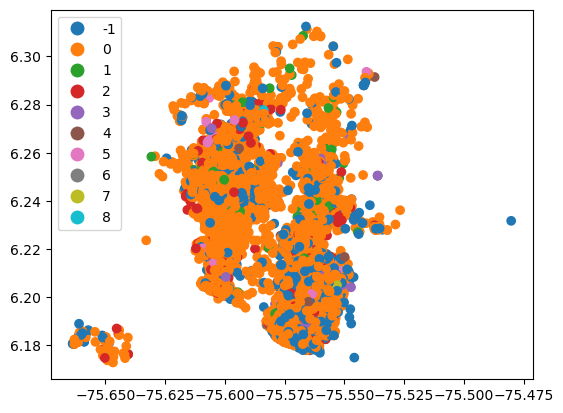

In [141]:
gdf.plot(column = 'cluster2', legend = True, categorical = True)

## Resultados anteriores

In [99]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps = 4.9, min_samples = 2)
clusters = dbscan.fit_predict(data_estandarizada)

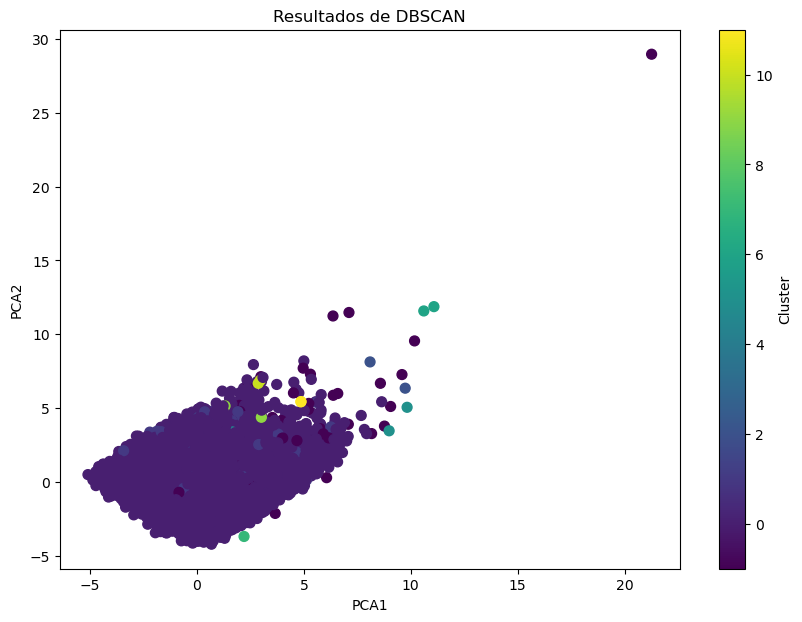

In [100]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
 
# Reducir la dimensionalidad a 2D usando PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_estandarizada)
 
# Crear un DataFrame con las dos primeras componentes principales
data_pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
data_pca_df['cluster'] = clusters
 
# Graficar los resultados
plt.figure(figsize=(10, 7))
plt.scatter(data_pca_df['PCA1'], data_pca_df['PCA2'], c=data_pca_df['cluster'], cmap='viridis', s=50)
plt.title('Resultados de DBSCAN')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()

In [101]:
# Añadir los resultados de los clusters al DataFrame
datos['cluster'] = clusters
 
# Ver los primeros registros con los clusters asignados
print(datos.head())
 
# Contar el número de puntos en cada cluster
print(datos['cluster'].value_counts())

   Unnamed: 0       price  builtArea  pricePerBuiltSqm  stratum  \
0           0  1450000000     280.00      5.178571e+06      6.0   
1           1   225000000      54.78      4.107338e+06      4.0   
2           2   185000000      70.00      2.642857e+06      4.0   
3           3   410000000      90.00      4.555556e+06      5.0   
4           4   300000000      80.00      3.750000e+06      1.0   

   administrationFee     floor  isDuplex  privateArea  rooms  ...  \
0       9.000000e+05  7.125252         0       280.00      3  ...   
1       2.718438e+06  7.125252         0        54.78      3  ...   
2       2.718438e+06  3.000000         0        70.00      2  ...   
3       2.718438e+06  7.125252         0        90.00      3  ...   
4       2.718438e+06  7.125252         0        80.00      3  ...   

   hasTennisCourt  hasSoccerField  hasKidsPlayZone  hasGreenZones  \
0               0               0                1              1   
1               0               0           

In [102]:
datos['cluster'].unique()

array([ 0, -1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [157]:
datos.head()

,Unnamed: 0,price,builtArea,pricePerBuiltSqm,stratum,administrationFee,floor,isDuplex,privateArea,rooms,...,hasSoccerField,hasKidsPlayZone,hasGreenZones,isResidentialComplex,hasConcierge,hasVisitorParking,hasPool,cluster,Class,cluster2
0,0,1450000000,280.00,5.178571e+06,6.0,9.000000e+05,7.125252,0,280.00,3,...,0,1,1,1,1,0,1,0,-1,0
1,1,225000000,54.78,4.107338e+06,4.0,2.718438e+06,7.125252,0,54.78,3,...,0,0,0,0,0,0,0,0,-1,0
2,2,185000000,70.00,2.642857e+06,4.0,2.718438e+06,3.000000,0,70.00,2,...,0,0,0,0,0,1,0,0,-1,3
3,3,410000000,90.00,4.555556e+06,5.0,2.718438e+06,7.125252,0,90.00,3,...,0,0,0,0,0,0,0,0,-1,0
4,4,300000000,80.00,3.750000e+06,1.0,2.718438e+06,7.125252,0,80.00,3,...,0,0,0,0,0,0,0,0,-1,0


<Axes: >

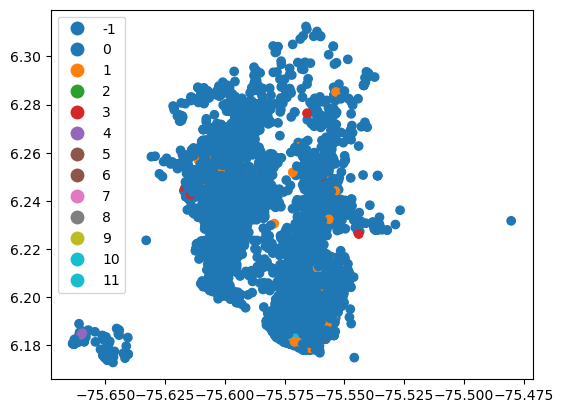

In [158]:
gdf.plot(column = 'cluster', legend = True, categorical = True)